<a href="https://colab.research.google.com/github/zhentinela-ai/red-nueronal-desde-cero/blob/main/Red_Neuronal_desde_cero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb -qU

     |████████████████████████████████| 1.8 MB 12.8 MB/s 
     |████████████████████████████████| 181 kB 64.0 MB/s 
     |████████████████████████████████| 153 kB 65.4 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 


In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import torch

import csv

import wandb

from sklearn.datasets import make_circles

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
wandb.init(project="neuronal_network_0", entity="zhent-ai")

wandb: Currently logged in as: zhent (zhent-ai). Use `wandb login --relogin` to force relogin


In [ ]:
wandb.config = {
  "learning_rate": 0.05,
  "epochs": 1500,
  "batch_size": 128
}

(500, 1)


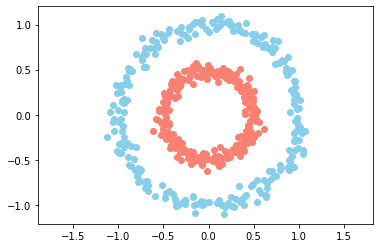

In [ ]:
# Create dataset

n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]
print(Y.shape)

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue", cmap='viridis')
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon", cmap='viridis')
plt.axis('equal')
plt.show()


In [ ]:
# Clase de la capa de la red

class neural_layer: 

  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f
    
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1



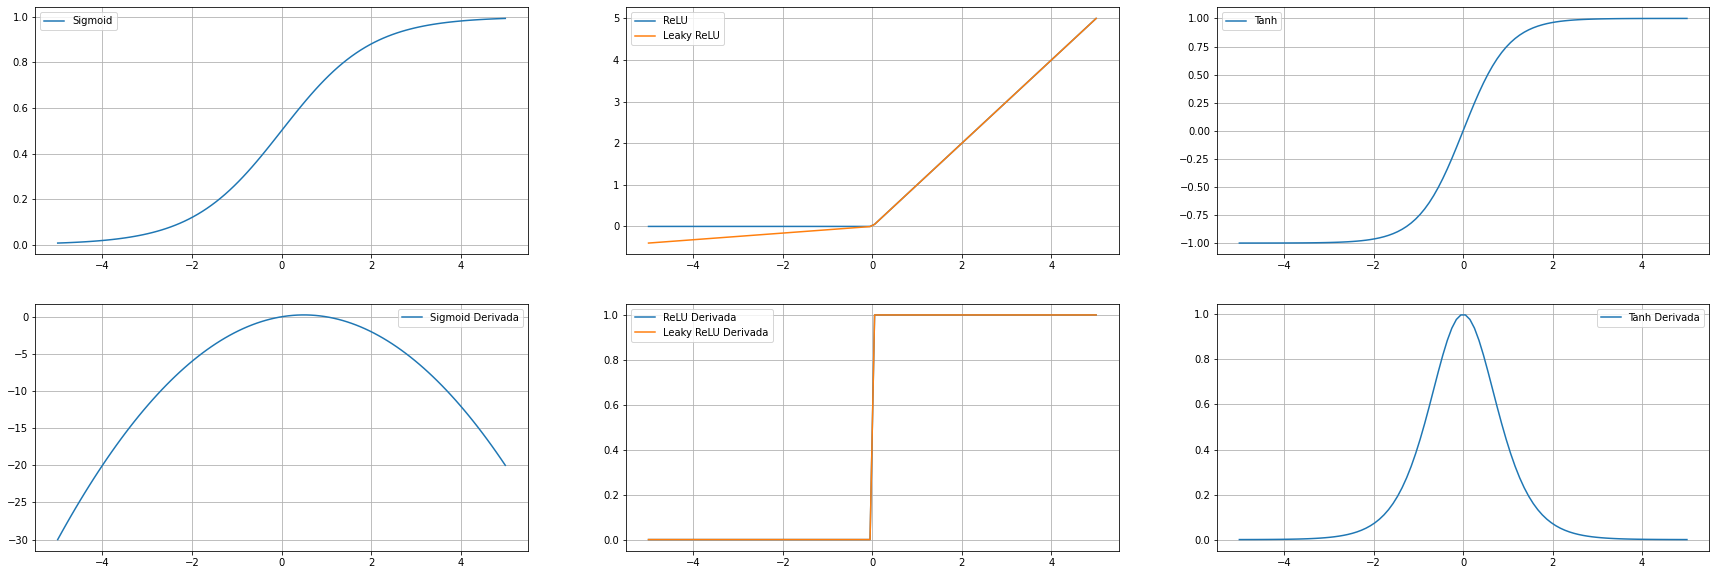

In [ ]:
# Function de activación
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu = [lambda x: (np.maximum(0, x)),]  
relu.append(lambda x: (x > 0).astype(int))

lrelu = [lambda x: (np.maximum(x, x * .08))]
lrelu.append(lambda x: (x > 0).astype(int))

tanh = (lambda x: (1 - np.e ** (-2 * x)) / (1 + np.e ** (-2 * x)),
        lambda x: 1 - ((1 - np.e ** (-2 * x)) / (1 + np.e ** (-2 * x))) ** 2)


_x = np.linspace(-5, 5, 100)

fig, axs = plt.subplots(2, 3, figsize=(30, 10))
    
axs[0][0].plot(_x, sigm[0](_x), label="Sigmoid")
axs[1][0].plot(_x, sigm[1](_x), label="Sigmoid Derivada")

axs[0][1].plot(_x, relu[0](_x), label="ReLU")
axs[1][1].plot(_x, relu[1](_x), label="ReLU Derivada")

axs[0][1].plot(_x, lrelu[0](_x), label="Leaky ReLU")
axs[1][1].plot(_x, lrelu[1](_x), label="Leaky ReLU Derivada")

axs[0][2].plot(_x, tanh[0](_x), label="Tanh")
axs[1][2].plot(_x, tanh[1](_x), label="Tanh Derivada")

for col in range(len(axs[1:,:].T)):
  for row in range(len(axs[:,3:])):
    axs[row][col].grid()
    axs[row][col].legend()


In [ ]:
l0 = neural_layer(p, 2, relu)
l1 = neural_layer(2, 2, relu)
# ...

def create_nn(topology, act_fs):

  nn = []

  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l+1], act_fs[l]))
    # nn.append(neural_layer(topology[l], topology[l+1], act_fs))

  return nn


In [ ]:
topology = [p, 4, 8, 4, 1]
act_fs_1 = [sigm, relu, sigm, sigm, sigm] # ineficiente para problemás no líneales, descartada
act_fs_2 = [sigm, sigm, sigm, sigm, sigm] 
act_fs_3 = [sigm, tanh, tanh, sigm, sigm] 
act_fs_4 = [sigm, lrelu, tanh, tanh, sigm]
act_fs_5 = [tanh, tanh, tanh, tanh, tanh]
act_fs_6 = [tanh, lrelu, sigm, lrelu, sigm] # siquiera la leaky relu funciona aquí

neural_net = create_nn(topology, act_fs_6)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
          lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  out = [(None, X)]

  # Forward pass
  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  if train:

    # Backward pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(neural_net) - 1:
        # Calcular delta última capa
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a)) 
      else:
        # Calcular del respecto a capa previa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W
    
      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

      with open('/content/drive/MyDrive/Data_NN/Train_data/Weighlt_LRelu', 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(neural_net[l].W)

      with open('/content/drive/MyDrive/Data_NN/Train_data/bias_LRelu', 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(neural_net[l].b)
      
      print(lr)

  return out[-1][1]

# train(neural_net, X, Y, l2_cost)
print("")

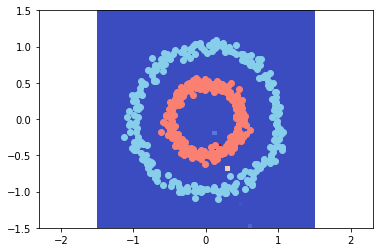

Loss 0.5303582908486799


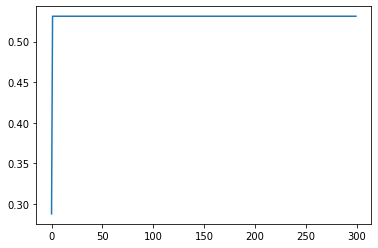

0.075
0.075
0.075
0.075
0.075
0.075
0.075
0.075
0.075
0.075
0.075
0.075
0.075
0.075
0.075
0.075


In [ ]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, act_fs_6)

loss = []

for i in range(1500):

  # Entrenamis a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.075)

  if i % 5 == 0:

    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]
        wandb.log({"loss": np.mean(loss),
               "epochs": 1000})
    
    plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
    plt.axis('equal')

    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue", cmap='viridis')
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon", cmap='viridis')

    # plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.01_epocas_1000_T/map/map_{i}.png")
    # plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.001_epocas_1000_T/map/map_{i}.png")
    # plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.0025_epocas_2500_T/map/map_{i}.png")
    # plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.05_epocas_1000_S/map/map_{i}.png")
    # plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.25_epocas_1000_S/map/map_{i}.png")
    # plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.3_epocas_1000_S/map/map_{i}.png")
    # plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.01_epocas_1000_S_T/map/map_{i}.png")
    # plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.005_epocas_1000_S_T_R/map/map_{i}.png")
    plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.075_epocas_1500_LR/map/map_{i}.png")

    clear_output(wait=True)
    plt.show()

    plt.plot(range(len(loss)), loss)

    # plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.01_epocas_1000_T/loss/loss_{i}.png")
    # plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.001_epocas_1000_T/loss/loss_{i}.png")
    # plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.0025_epocas_2500_T/loss/loss_{i}.png")
    # plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.05_epocas_1000_S/loss/loss_{i}.png")
    # plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.25_epocas_1000_S/loss/loss_{i}.png")
    # plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.3_epocas_1000_S/loss/loss_{i}.png")
    # plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.01_epocas_1000_S_T/loss/loss_{i}.png")
    # plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.005_epocas_1000_S_T_R/loss/loss_{i}.png")
    plt.savefig(f"/content/drive/MyDrive/Data_NN/images/lr_0.075_epocas_1500_LR/loss/loss_{i}.png")

    print("Loss", np.mean(loss))
    plt.show()
    time.sleep(.25)
